In [1]:
!pip install kaggle

In [7]:
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.head(),end='\n\n\n')
print(test_data.head(),end='\n\n\n')

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  




In [79]:
train_data_copy = train_data

In [11]:
train_data.info()
print('-'*40)
print(train_data.describe())
print('-'*40)
train_data.describe(include=['O'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
----------------------------------------
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   85

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


# Exploratory Data Analysis

## Home Planet
First let us see if there was any dependence on their home planet

In [20]:
train_data.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

This means that the passengers came from 3 planets and some of them are unmarked.

In [64]:
train_data[train_data['HomePlanet'].isnull()].count()

PassengerId     201
HomePlanet        0
CryoSleep       199
Cabin           195
Destination     197
Age             199
VIP             198
RoomService     195
FoodCourt       199
ShoppingMall    194
Spa             198
VRDeck          200
Name            194
Transported     201
dtype: int64

201 passengers do not have the home planet

In [74]:
train_data[train_data['HomePlanet'].isnull()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True


In [41]:
train_data.groupby('HomePlanet').count()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
HomePlanet,,,,,,,,,,,,,
Earth,4602,4488,4507,4503,4514,4487,4499,4505,4490,4503,4491,4496,4602
Europa,2131,2073,2070,2094,2085,2089,2095,2085,2078,2086,2094,2085,2131
Mars,1759,1716,1722,1717,1716,1716,1723,1721,1723,1723,1720,1718,1759


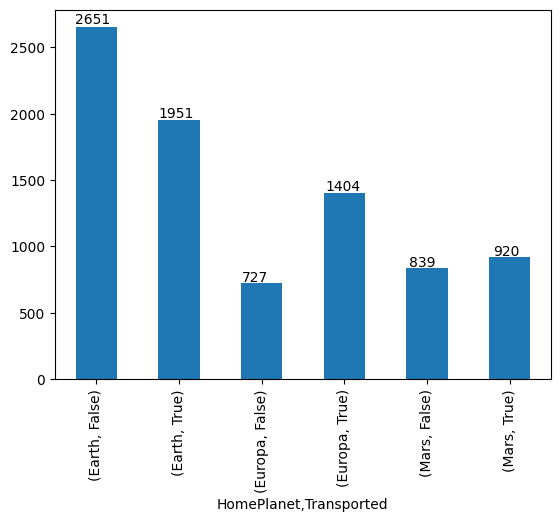

In [72]:
df = train_data.groupby(['HomePlanet','Transported'])
ax = df.count()['PassengerId'].plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

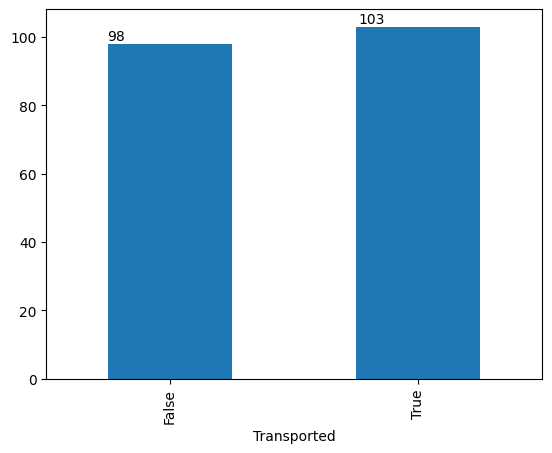

In [78]:
df = train_data[train_data['HomePlanet'].isnull()].groupby(['Transported'])
ax = df.count()['PassengerId'].plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

In [96]:
train_data['HomePlanet'].fillna('missing', inplace=True)

## CryoSleep

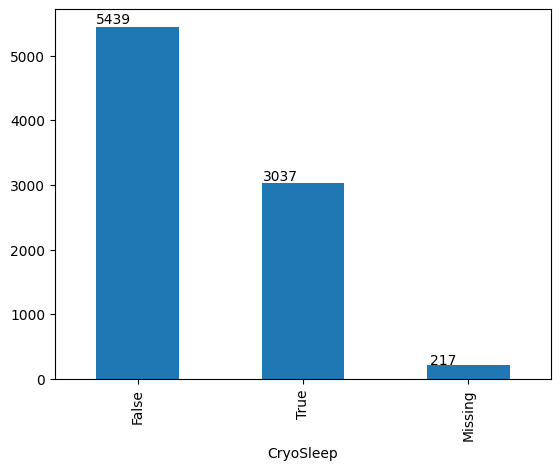

In [95]:
df = train_data.groupby(['CryoSleep'])
ax = df.count()['PassengerId'].plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

In [93]:
train_data[train_data['CryoSleep'].isna()].shape

(217, 14)

In [94]:
train_data['CryoSleep'].fillna('Missing',inplace=True)

## cabin

In [117]:
def split_cabin(x):
  if len(str(x).split('/'))<3:
    return ['Missing','Missing','Missing']
  else:
    print
    return str(x).split('/')

In [124]:
print(f"count of unique cabins are {train_data['Cabin'].unique().shape[0]} vs count of unique rows {train_data.shape[0]}")
print(train_data['Cabin'].unique())
train_data['temp_cabin']=train_data['Cabin'].apply(lambda x: split_cabin(x))
train_data['Deck']=train_data['temp_cabin'].apply(lambda x: x[0])
train_data['num']=train_data['temp_cabin'].apply(lambda x: x[1])
train_data['side']=train_data['temp_cabin'].apply(lambda x: x[2])
train_data[train_data['Deck'] != 'Missing'].head()

count of unique cabins are 6561 vs count of unique rows 8693
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,temp_cabin,Deck,side,num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"[B, 0, P]",B,P,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"[F, 0, S]",F,S,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"[A, 0, S]",A,S,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"[A, 0, S]",A,S,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"[F, 1, S]",F,S,1


In [129]:
train_data['num'].unique().shape

(1818,)

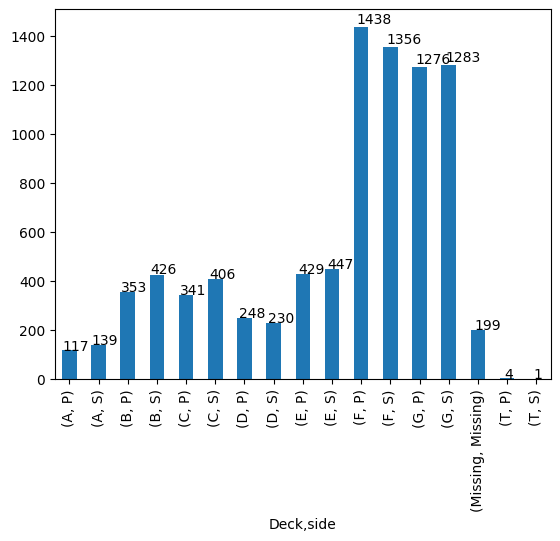

In [130]:
df = train_data.groupby(['Deck','side'])
ax = df.count()['PassengerId'].plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))